This project analyses the customer dataset to determine which segment(s) of customers are more likely to open term deposit loan accounts with the bank.


These are the variables involved in the analysis:

1 - age: (numeric)
2 - job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education: (categorical: primary, secondary, tertiary and unknown)
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
8 - balance: Balance of the individual.
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no').
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Output variable (desired target):
21 - y/deposit - has the client subscribed a term deposit? (binary: 'yes','no')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import subplots,tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [2]:
df=pd.read_csv('bank.csv')
term_deposits = df.copy()
df.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

In [3]:
df.describe()

age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  
max      854.000000     58.000000

 Mean Age is aproximately 41 years old. (Minimum: 18 years old and Maximum: 95 years old.)

The mean balance is 1,528. However, the Standard Deviation (std) is high, so the balance is heavily distributed across the dataset.

The variable 'duration' is highly correlated with whether a person will open an account, since the longer the person is talked to, the more likely they are to open the account. Hence, it makes sense to drop the account

In [4]:
df.shape

(11162, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [7]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

C:\Users\spars\AppData\Local\Temp\ipykernel_6320\1295275282.py:12: UserWarning:

FixedFormatter should only be used together with FixedLocator



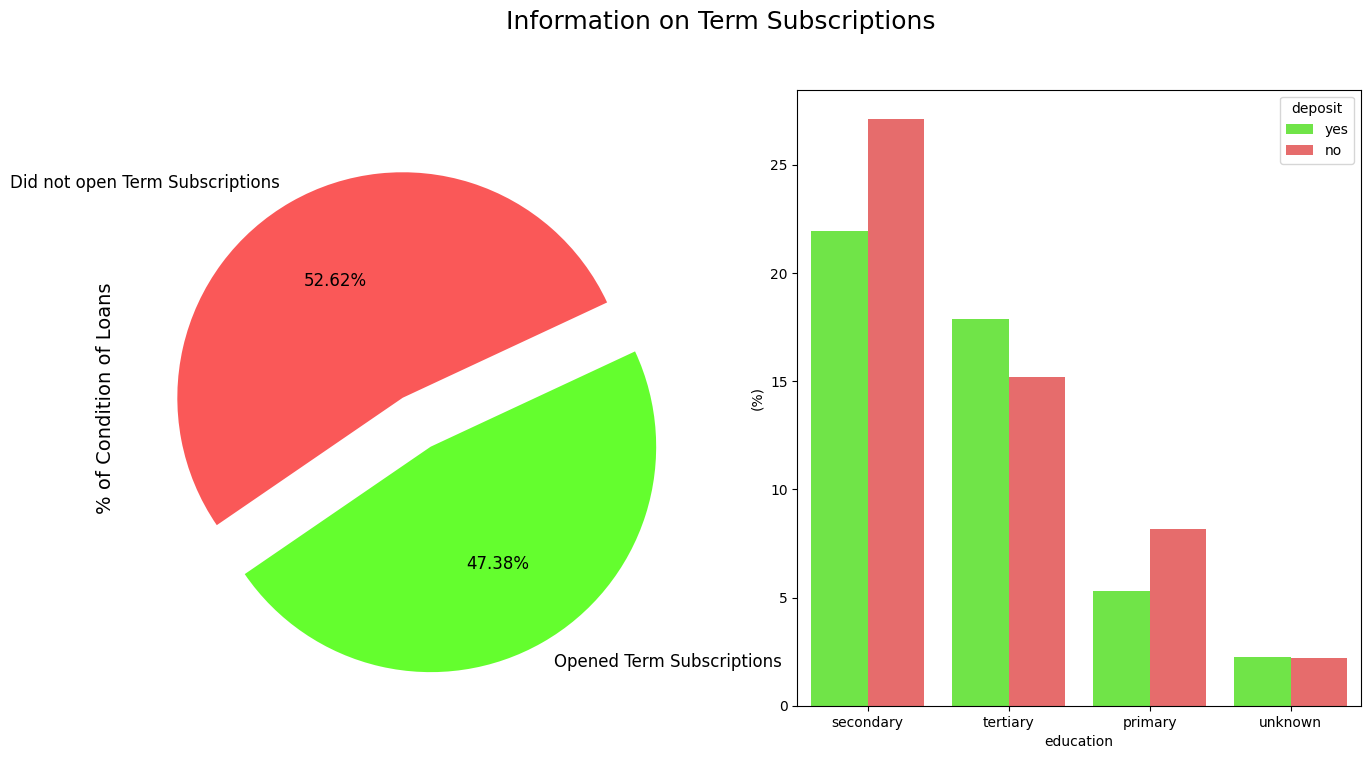

In [8]:
f, ax=plt.subplots(nrows=1,ncols=2,figsize=(16,8))

colors=['#FA5858','#64FE2E']
labels='Did not open Term Subscriptions', 'Opened Term Subscriptions'
plt.suptitle('Information on Term Subscriptions',fontsize=18)
df['deposit'].value_counts().plot.pie(explode=[0,0.25],autopct='%1.2f%%',ax=ax[0],colors=colors,labels=labels,fontsize=12,startangle=25)
ax[0].set_ylabel('% of Condition of Loans',fontsize=14)

palette=['#64FE2E','#FA5858']
sns.barplot(x='education',y='balance',hue='deposit',data=df,palette=palette,estimator=lambda x: len(x)/len(df)*100)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(df["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

C:\Users\spars\AppData\Local\Temp\ipykernel_6320\926160586.py:3: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



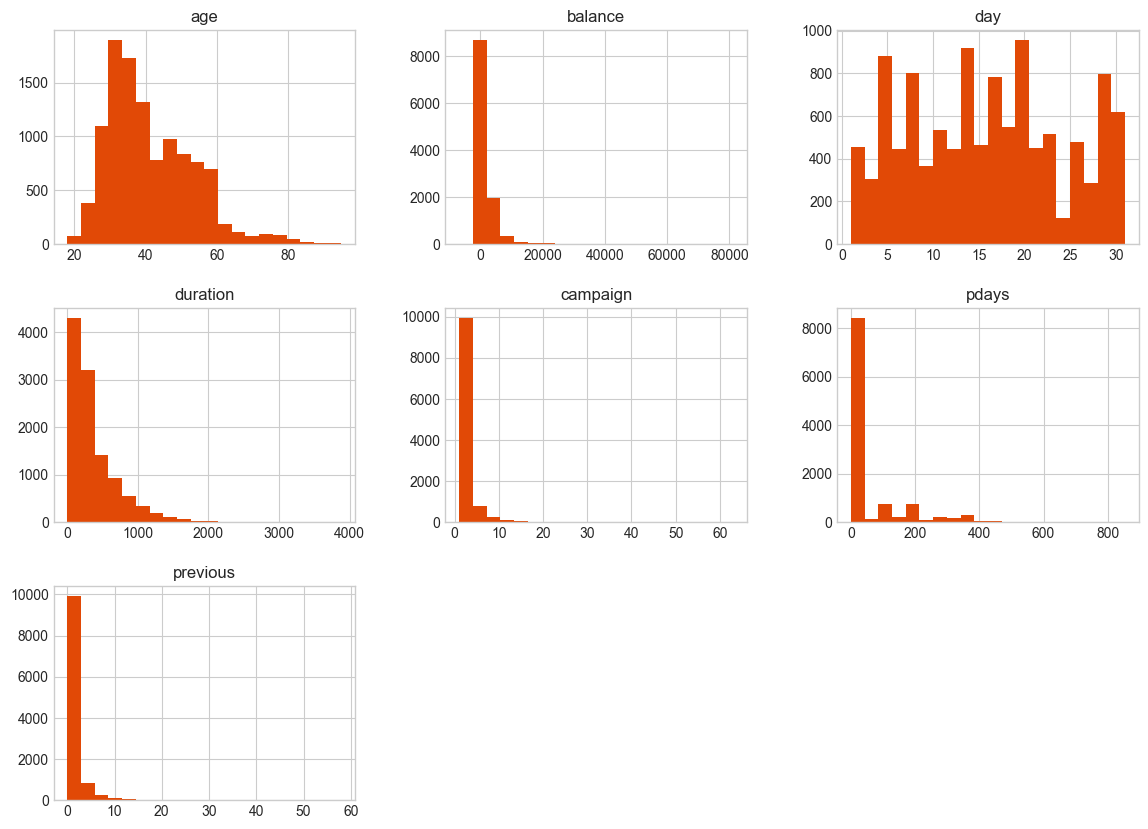

In [9]:
# Visualizing the distribution of numerical data

plt.style.use('seaborn-whitegrid')
df.hist(bins=20,figsize=(14,10),color='#E14906')
plt.show()

In [10]:
df['deposit'].value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

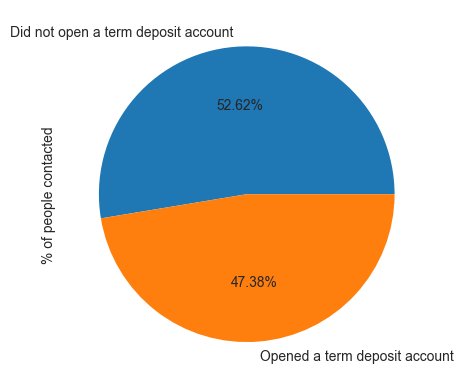

In [11]:
#Visualizing the distribution of the target variable. Suggests an almost even split.

labels=['Did not open a term deposit account', 'Opened a term deposit account']
ax=df['deposit'].value_counts().plot.pie(autopct='%1.2f%%',labels=labels)
ax.set_ylabel('% of people contacted')
plt.show()

C:\Users\spars\AppData\Local\Temp\ipykernel_6320\1881986405.py:13: UserWarning:

FixedFormatter should only be used together with FixedLocator



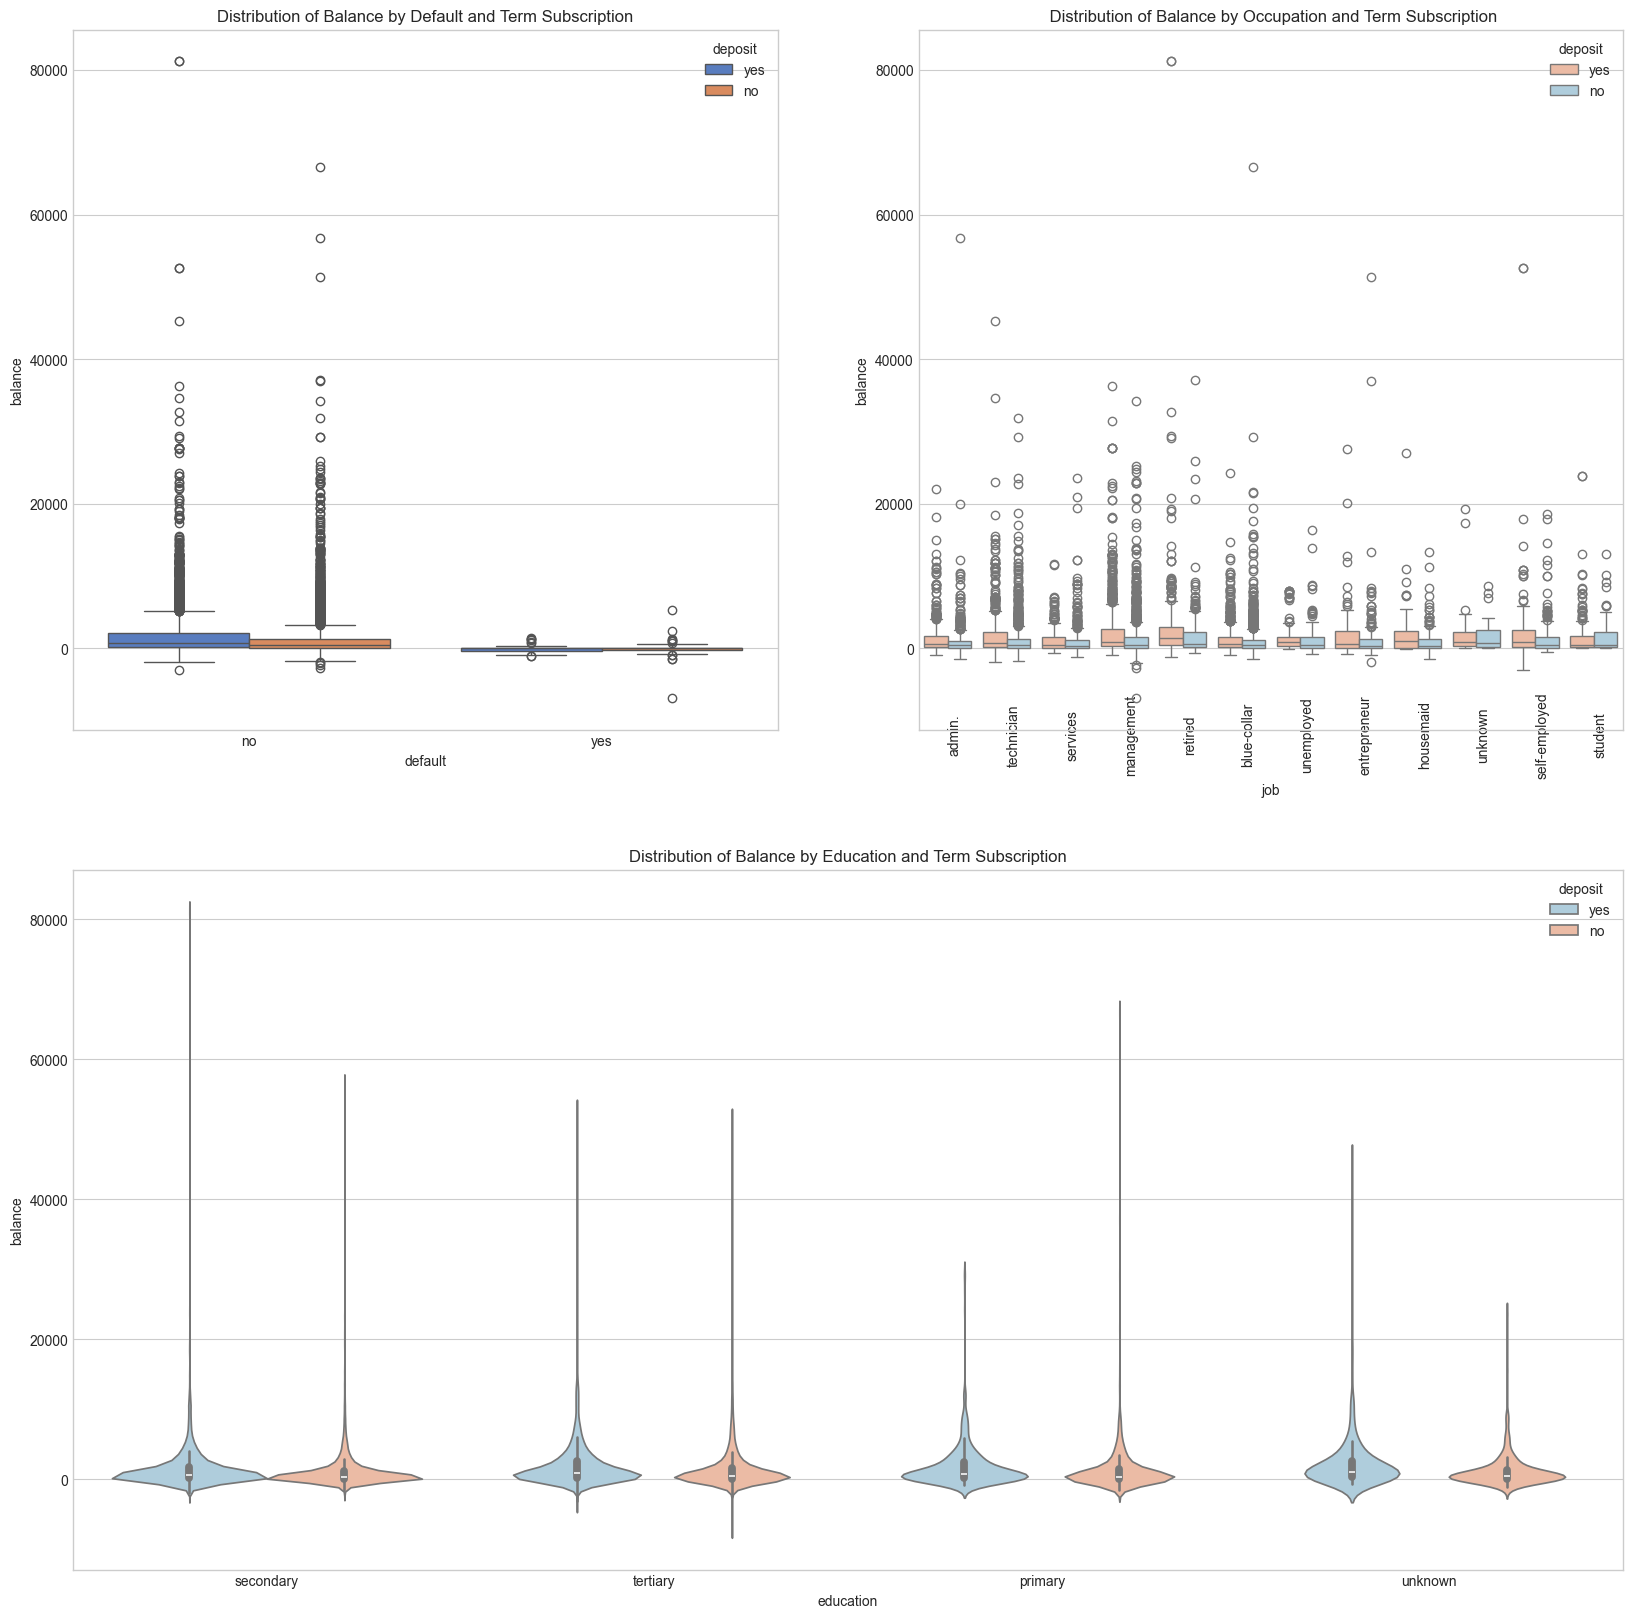

In [12]:
# Plotting the distribution of balance by default stratified by term subscription, distribution of balance by job stratified by term subscription,
# and distribution of balance by education stratified by term subscription

fig=plt.figure(figsize=(20,20))
ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)
ax3=fig.add_subplot(212)

g=sns.boxplot(data=df,x='default',y='balance',hue='deposit',palette='muted',ax=ax1)
g.set_title('Distribution of Balance by Default and Term Subscription')

g1=sns.boxplot(data=df,x='job',y='balance',hue='deposit',palette='RdBu',ax=ax2)
g1.set_xticklabels(df['job'].unique(),rotation=90,rotation_mode='anchor')
g1.set_title(' Distribution of Balance by Occupation and Term Subscription')

g2=sns.violinplot(data=df,x='education',y='balance',hue='deposit',palette='RdBu_r')
g2.set_title('Distribution of Balance by Education and Term Subscription')

plt.show()

In [13]:
# Analysis by Occupation

df=df.drop(df[df['job']=='unknown'].index)

In [14]:
df.shape

(11092, 17)

In [15]:
df['job'].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'self-employed', 'student'], dtype=object)

In [16]:
df['job']=df['job'].replace(to_replace='admin.',value='management')
df['job'].unique()

array(['management', 'technician', 'services', 'retired', 'blue-collar',
       'unemployed', 'entrepreneur', 'housemaid', 'self-employed',
       'student'], dtype=object)

In [17]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

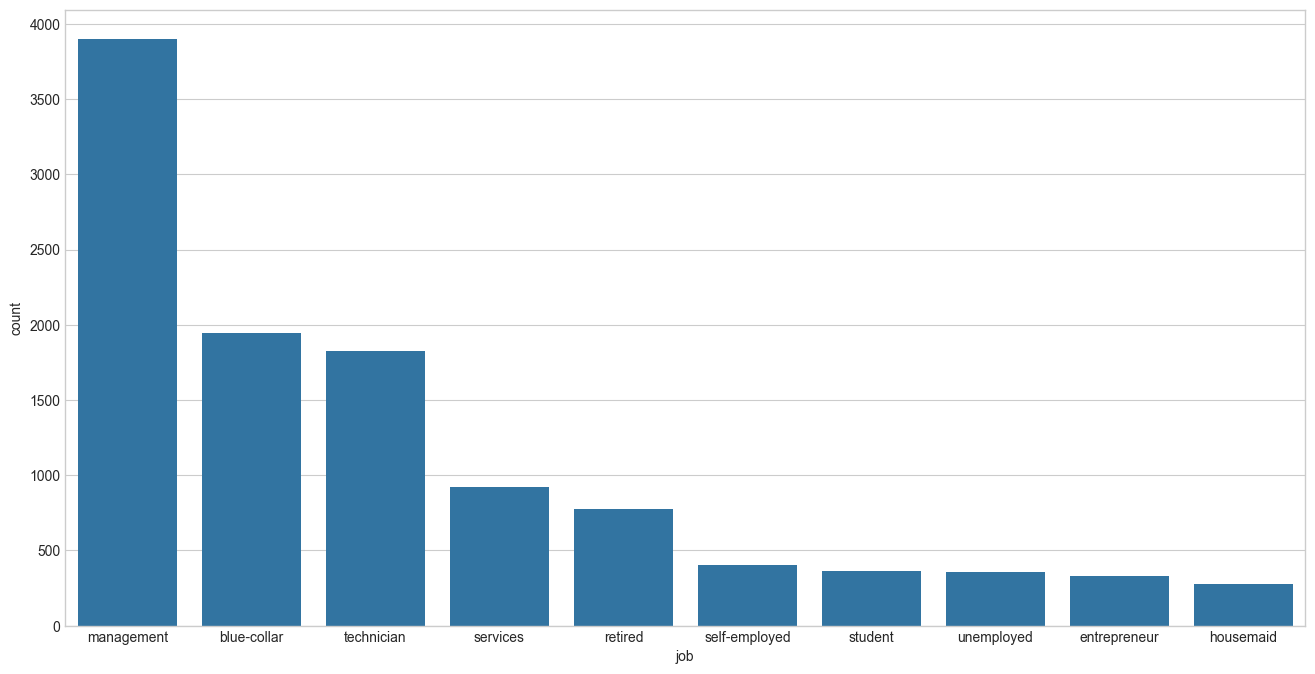

In [18]:
plt.figure(figsize=(16,8))
sns.countplot(data=df,x='job',order=df['job'].value_counts().index)
plt.show()

In [19]:
df['job'].value_counts()

job
management       3900
blue-collar      1944
technician       1823
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
Name: count, dtype: int64

Management is the most common occupation in the dataset

In [20]:
subscribed_df=df[df['deposit']=='yes']
occupations=df['job'].unique().tolist()

In [21]:
management=subscribed_df['age'][subscribed_df['job']=='management'].values
technician=subscribed_df['age'][subscribed_df['job']=='technician'].values
services=subscribed_df['age'][subscribed_df['job']=='services'].values
retired=subscribed_df['age'][subscribed_df['job']=='retired'].values
blue_collar=subscribed_df['age'][subscribed_df['job']=='blue-collar'].values
unemployed=subscribed_df['age'][subscribed_df['job']=='unemployed'].values
entrepreneur=subscribed_df['age'][subscribed_df['job']=='entrepreneur'].values
housemaid=subscribed_df['age'][subscribed_df['job']=='housemaid'].values
self_employed=subscribed_df['age'][subscribed_df['job']=='self-employed'].values
student=subscribed_df['age'][subscribed_df['job']=='student'].values

ages=[management,technician,services,retired,blue_collar,unemployed,entrepreneur,housemaid,self_employed,student]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)','rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)',
          'rgba(127, 96, 0, 0.5)','rgba(229, 126, 56, 0.5)', 'rgba(229, 56, 56, 0.5)','rgba(174, 229, 56, 0.5)', 'rgba(229, 56, 56, 0.5)']

traces=[]

for xd,yd,cls in zip(occupations, ages, colors):
    traces.append(go.Box(y=yd,name=xd,boxpoints='all',jitter=0.5,whiskerwidth=0.2,fillcolor=cls,marker=dict(size=2,),line=dict(width=1),))

layout=go.Layout(title='Distribution of Ages by Occupation',yaxis=dict(autorange=True,showgrid=True,zeroline=True,dtick=5,gridcolor='rgb(255, 255, 255)',
                 gridwidth=1,zerolinecolor='rgb(255, 255, 255)',zerolinewidth=2,),margin=dict(l=40,r=30,b=80,t=100,),paper_bgcolor='rgb(224,255,246)',
plot_bgcolor='rgb(251,251,251)',showlegend=False)
fig=go.Figure(data=traces,layout=layout)
iplot(fig,image_height=3800)

Retired people have the highest ages while students have the lowest ages

In [22]:
# Analyzing balances by occupation


df['balance_status']=np.where(df['balance']<0,'negative',np.where((df['balance']>=0) & (df['balance']<=30000),'low',
                              np.where((df['balance']>30000) & (df['balance']<=40000),'middle',np.where(df['balance']>40000,'high','unknown'))))
lst=[df]

# df['balance_status']=np.nan
# for col in lst:
#     col[col['balance']<0,'balance_status']='negative'
#     col[(col['balance']>=0) & (col['balance']<=30000),'balance_status']='low'
#     col[(col['balance']>30000) & (col['balance']<=40000),'balance_status']='middle'
#     col[col['balance']>40000,'balance_status']='high'

In [23]:
df['balance_status'].value_counts()

balance_status
low         10388
negative      688
middle          8
high            8
Name: count, dtype: int64

In [24]:
negative=df['balance'][df['balance_status']=='negative'].values.tolist()
low=df['balance'][df['balance_status']=='low'].values.tolist()
middle=df['balance'][df['balance_status']=='middle'].values.tolist()
high=df['balance'][df['balance_status']=='high'].values.tolist()

In [25]:
job_balance=df.groupby(['job','balance_status'])['balance'].mean()

trace1 = go.Barpolar(r=[-199.0, -392.0, -209.0, -247.0, -233.0, -270.0, -271.0, 0, -276.0, -134.5],
                    text=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed","services", "student", "technician", 
                          "unemployed"],name='Negative Balance',marker=dict(color='rgb(246, 46, 46)'))
trace2 = go.Barpolar(r=[319.5, 283.0, 212.0, 313.0, 409.0, 274.5, 308.5, 253.0, 316.0, 330.0],
                     text=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed","services", "student", "technician", 
                            "unemployed"],name='Low Balance',marker=dict(color='rgb(246, 97, 46)'))
trace3 = go.Barpolar(r=[2128.5, 2686.0, 2290.0, 2366.0, 2579.0, 2293.5, 2005.5, 2488.0, 2362.0, 1976.0],
                     text=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed","services", "student", "technician",
                           "unemployed"],name='Middle Balance',marker=dict(color='rgb(246, 179, 46)'))
trace4 = go.Barpolar(r=[14247.5, 20138.5, 12278.5, 12956.0, 20723.0, 12159.0, 12223.0, 13107.0, 12063.0, 15107.5],
                     text=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed","services", "student", "technician",
                           "unemployed"],name='High Balance',marker=dict(color='rgb(46, 246, 78)'))

data = [trace1, trace2, trace3, trace4]
layout = go.Layout(title='Mean Balance in Account<br><i>by Job Occupation</i>',font=dict(size=12),legend=dict(font=dict(size=16)),
                   )
fig=go.Figure(data=data,layout=layout)
iplot(fig,filename='polar-area-chart',image_width=1200,image_height=200)

In [26]:
job_balance

job            balance_status
blue-collar    high              66653.000000
               low                1343.952079
               negative           -255.663507
entrepreneur   high              51439.000000
               low                1521.866221
               middle            36935.000000
               negative           -422.777778
housemaid      low                1428.660377
               negative           -474.111111
management     high              56831.000000
               low                1652.839373
               middle            33984.666667
               negative           -369.484848
retired        high              81204.000000
               low                2204.013316
               middle            34906.000000
               negative           -296.217391
self-employed  high              52587.000000
               low                1709.709091
               negative           -440.888889
services       low                1208.867299
    

People who in management roles and are retired have the highest average balance.

In [27]:
# Analysis of marital status

df['marital'].value_counts()

marital
married     6302
single      3499
divorced    1291
Name: count, dtype: int64

In [28]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [29]:
vals=df['marital'].value_counts().tolist()
labels=['married', 'single', 'divorced']
data=[go.Bar(x=labels,y=vals,marker=dict(color='#FE9A2E'))]
layout=go.Layout(title='Count by Marital Status')
fig=go.Figure(data=data,layout=layout)
iplot(fig,filename='basic-bar')

In [30]:
single=df['balance'][df['marital']=='single'].values
married=df['balance'][df['marital']=='married'].values
divorced=df['balance'][df['marital']=='divorced'].values

In [31]:
# Distribution of balances by marital statuses

single_dist=go.Histogram(x=single,histnorm='density',name='single',marker=dict(color='#6E6E6E'))
married_dist=go.Histogram(x=married,histnorm='density',name='married',marker=dict(color='#2E9AFE'))
divorced_dist=go.Histogram(x=divorced,histnorm='density',name='divorced',marker=dict(color='#FA5858'))

fig=subplots.make_subplots(rows=3,print_grid=False)
fig.append_trace(single_dist,1,1)
fig.append_trace(married_dist,2,1)
fig.append_trace(divorced_dist,3,1)

fig['layout'].update(showlegend=False,title='Balance Distribution by Marital Status',height=1000,width=800)
iplot(fig,filename='custom-sized-subplot-with-subplot-titles')

In [32]:
fig=ff.create_facet_grid(df,x='duration',y='balance',color_name='marital',show_boxes=False,marker={'size':10,'opacity':1.0},
                        colormap={'single': 'rgb(165, 242, 242)', 'married': 'rgb(253, 174, 216)', 'divorced': 'rgba(201, 109, 59, 0.82)'})

iplot(fig,filename='facet-custom colormap')

The analysis of marital status shows no significant insights other than the fact that divorced individuals have low low balances.

In [33]:
# There are also customers within the marital statuses that have either subscribed or not subscribed. Their balance distribution needs to be seen too.

fig=ff.create_facet_grid(df,y='balance',facet_row='marital',facet_col='deposit',trace_type='box')
iplot(fig,filename='facet box-traces')

Marital status, education and whether a person had a previous loan has a significant impact on the balances that they have

In [34]:
df['education'].value_counts()

education
secondary    5461
tertiary     3680
primary      1493
unknown       458
Name: count, dtype: int64

In [35]:
df.shape

(11092, 18)

In [36]:
df=df.drop(df[df['education']=='unknown'].index)
df['education'].unique()

array(['secondary', 'tertiary', 'primary'], dtype=object)

In [37]:
df.shape

(10634, 18)

In [38]:
df['marital/education'] = np.nan
lst = [df]

for col in lst:
    col.loc[(col['marital'] == 'single') & (df['education'] == 'primary'), 'marital/education'] = 'single/primary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'primary'), 'marital/education'] = 'married/primary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'primary'), 'marital/education'] = 'divorced/primary'
    col.loc[(col['marital'] == 'single') & (df['education'] == 'secondary'), 'marital/education'] = 'single/secondary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'secondary'), 'marital/education'] = 'married/secondary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'secondary'), 'marital/education'] = 'divorced/secondary'
    col.loc[(col['marital'] == 'single') & (df['education'] == 'tertiary'), 'marital/education'] = 'single/tertiary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'tertiary'), 'marital/education'] = 'married/tertiary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'tertiary'), 'marital/education'] = 'divorced/tertiary'

In [39]:
df.head()

age         job  marital  education default  balance housing loan  contact  \
0   59  management  married  secondary      no     2343     yes   no  unknown   
1   56  management  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54  management  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  \
0    5   may      1042         1     -1         0  unknown     yes   
1    5   may      1467         1     -1         0  unknown     yes   
2    5   may      1389         1     -1         0  unknown     yes   
3    5   may       579         1     -1         0  unknown     yes   
4    5   may       673         2     -1         0  unknown     yes   

  balance_status  marital/education  
0            low  married/secondary  
1            low  married/secondary  
2            low  married/secondary  
3            low  married/secondary  
4            low   married/tertiary

c:\users\spars\anaconda3\lib\site-packages\seaborn\axisgrid.py:854: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.


c:\users\spars\anaconda3\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


c:\users\spars\anaconda3\lib\site-packages\seaborn\axisgrid.py:854: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.


c:\users\spars\anaconda3\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an e

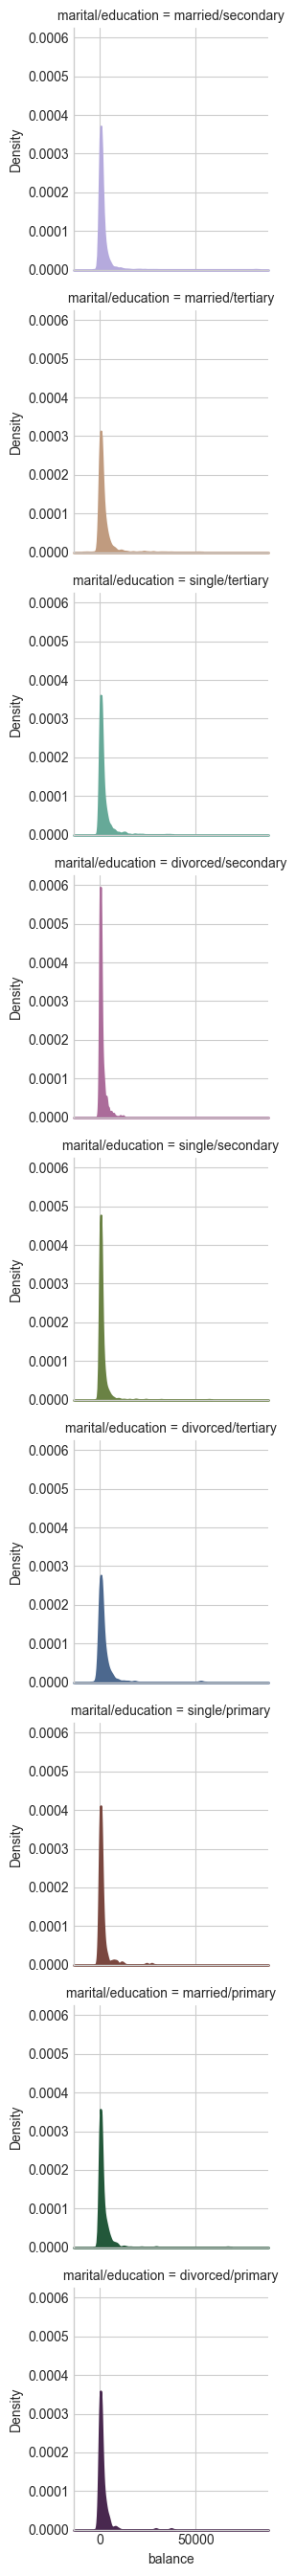

In [40]:
pal=sns.cubehelix_palette(n_colors=10,rot=10,light=0.7)
g=sns.FacetGrid(data=df,row='marital/education',hue='marital/education',palette=pal)
g.map(sns.kdeplot,'balance',clip_on=False,shade=True,alpha=1,lw=1.5,bw=0.2)
g.map(plt.axhline,y=0,lw=2,clip_on=False)
plt.show()

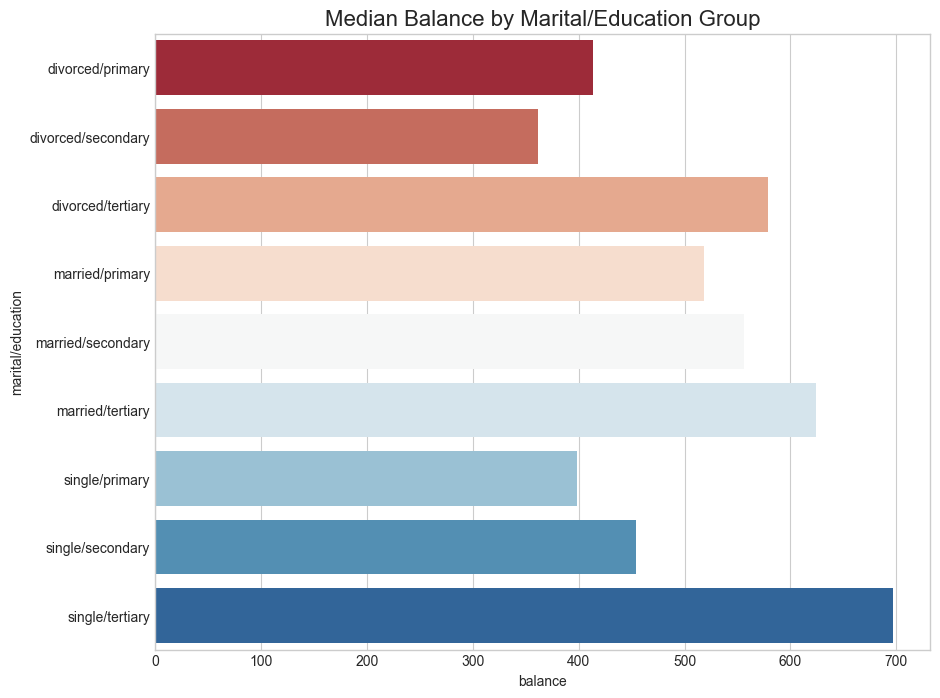

In [41]:
education_groups=df.groupby('marital/education',as_index=False,)['balance'].median()
fig=plt.figure(figsize=(10,8))
sns.barplot(data=education_groups,x='balance',y='marital/education',hue='marital/education',palette='RdBu')
plt.title('Median Balance by Marital/Education Group',fontsize=16)
plt.show()

In [42]:
# Visualizing the marital/education group that had loans

loan_balance=df.groupby(['marital/education','loan'],as_index=False)['balance'].median()

no_loan=loan_balance['balance'][loan_balance['loan']=='no'].values
has_loan=loan_balance['balance'][loan_balance['loan']=='yes'].values

labels=loan_balance['marital/education'].unique().tolist()

trace0=go.Scatter(x=no_loan,y=labels,mode='markers',name='No Loan',marker=dict(color='rgb(175,238,238)',line=dict(color='rgb(0,139,139)',width=1)
                  ,symbol='circle',size=16))
trace1=go.Scatter(x=has_loan,y=labels,mode='markers',name='Previous Loan',marker=dict(color='rgb(250,128,114)',line=dict(color='rgb(178,34,34)'
                  ,width=1),symbol='circle',size=16))
data=[trace0,trace1]

layout = go.Layout(title="Median Balance by Previous Loan History in Married/Educational Clusters",xaxis=dict(showgrid=False,showline=True,
                  linecolor='rgb(102, 102, 102)',titlefont=dict(color='rgb(204, 204, 204)'),tickfont=dict(color='rgb(102, 102, 102)'),
                  showticklabels=False,dtick=10,ticks='outside',tickcolor='rgb(102, 102, 102)'),margin=dict(l=140,r=40,b=50,t=80),
                  legend=dict(font=dict(size=10),yanchor='middle',xanchor='right'),width=1000,height=800,paper_bgcolor='rgb(255,250,250)',
                  plot_bgcolor='rgb(255,255,255)',hovermode='closest')

fig=go.Figure(layout=layout,data=data)
iplot(fig,filename='Scatterplot of Marital/Education Status vs Loan')

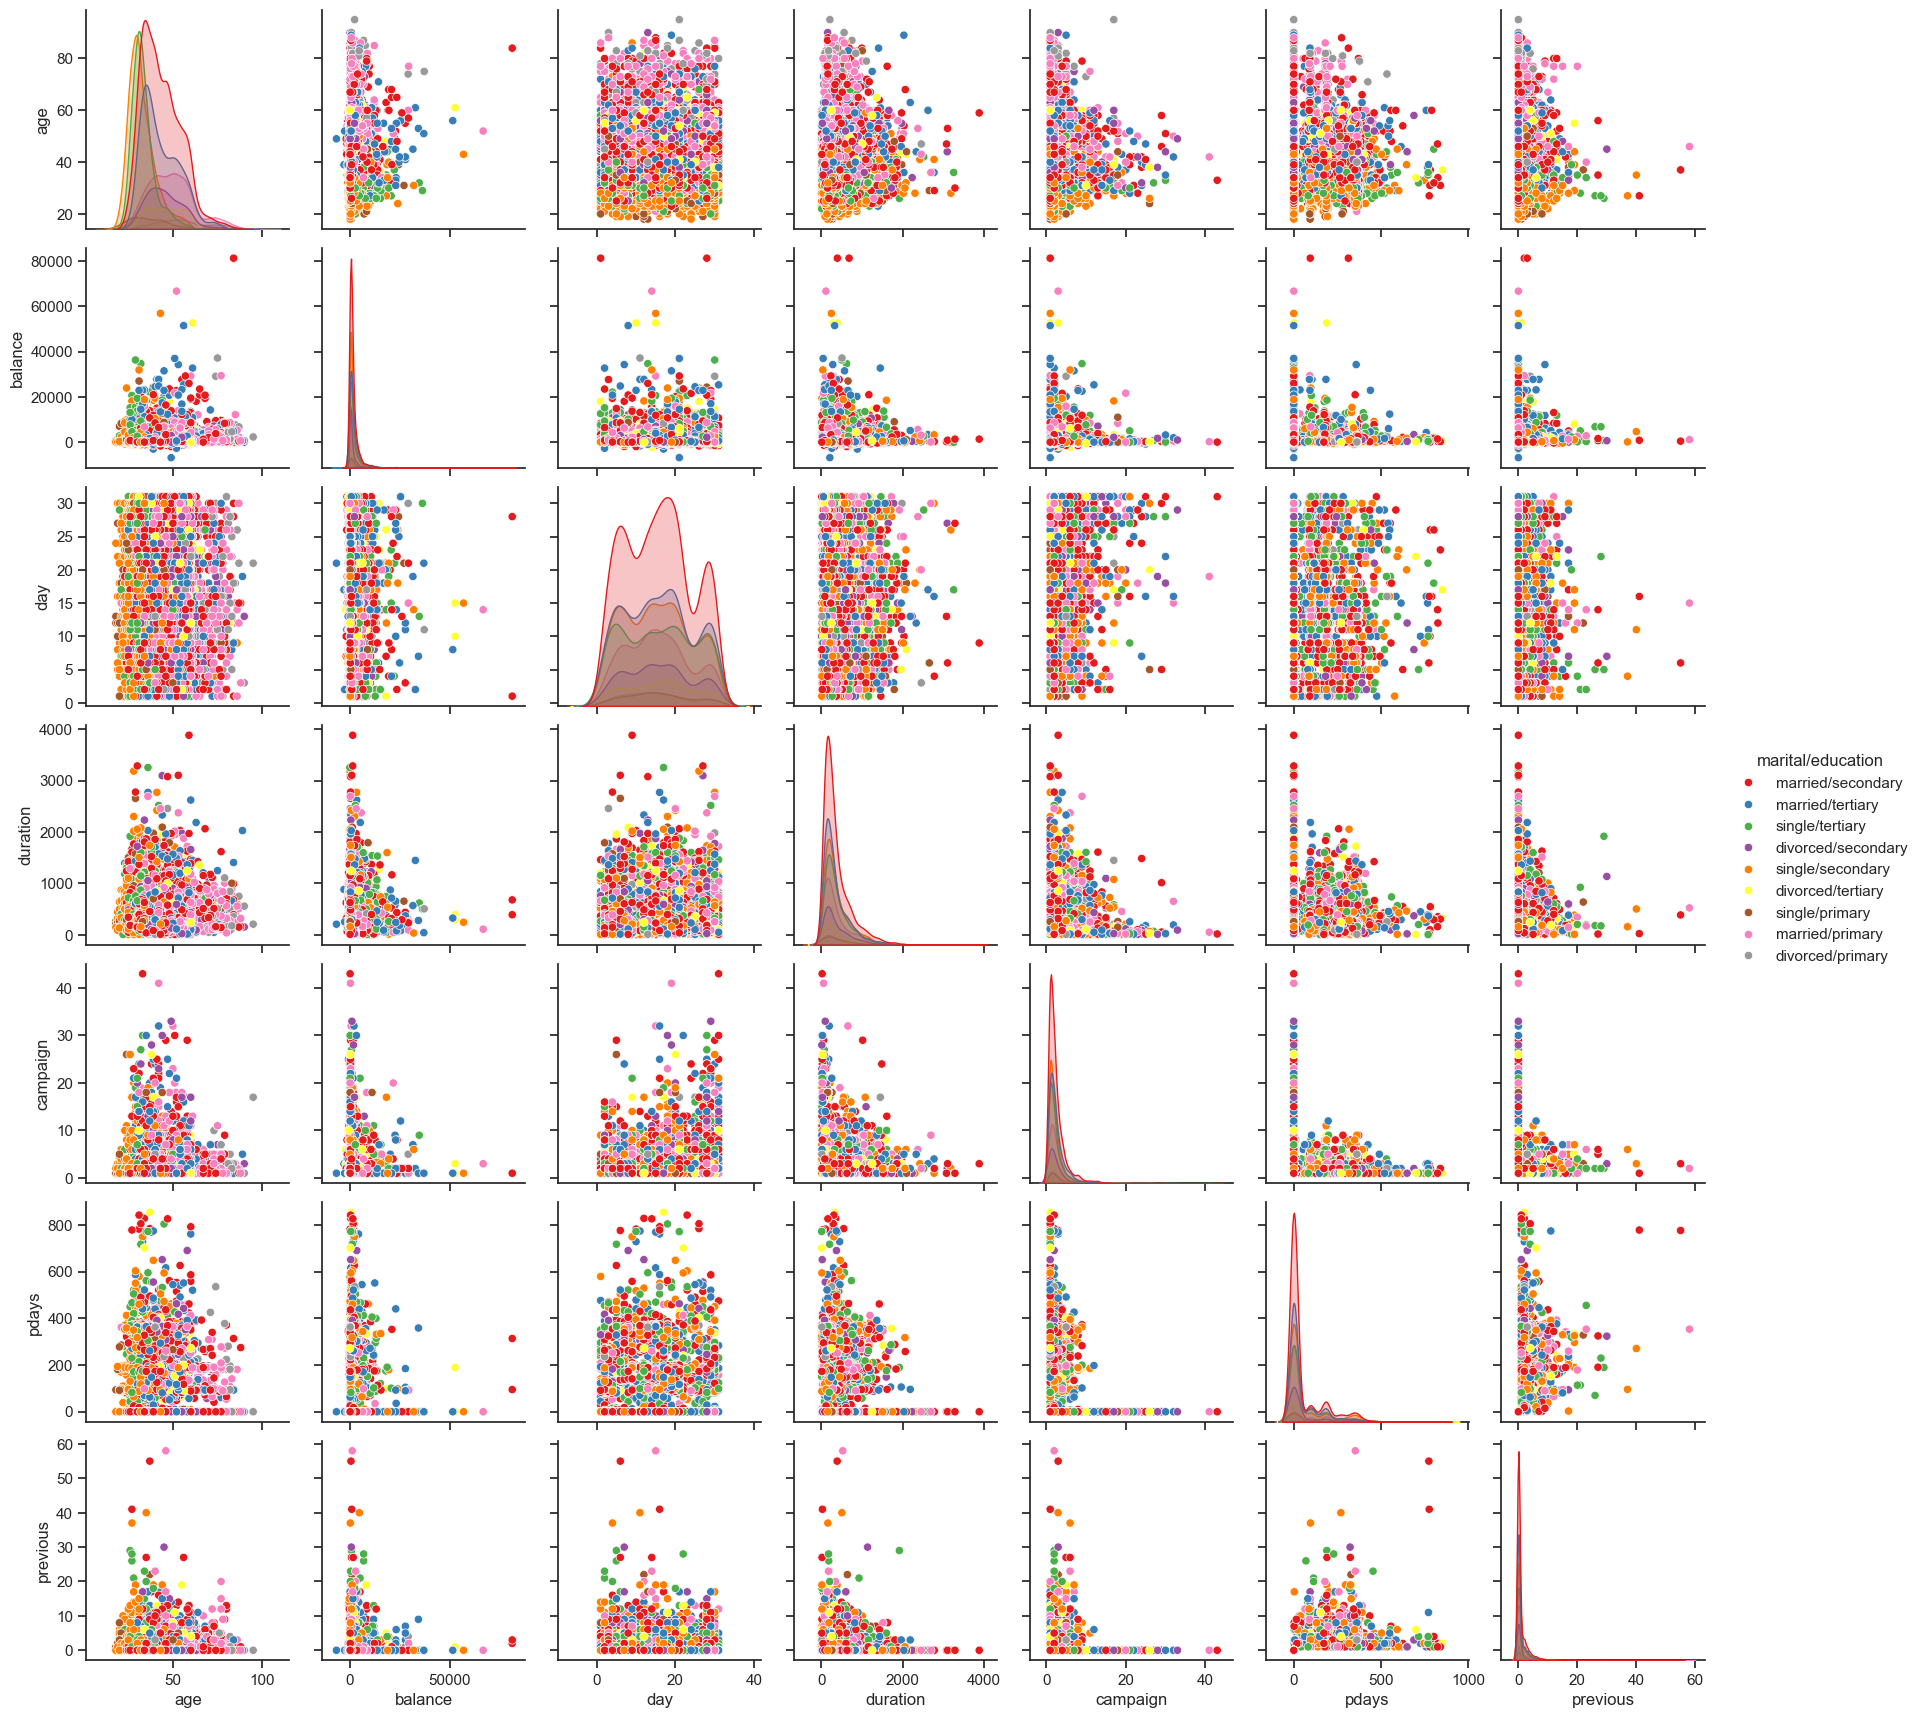

In [43]:
# Plotting pairplots by using marital and education status as the distinguishing factor

sns.set(style='ticks')
sns.pairplot(data=df,hue='marital/education',palette='Set1')
plt.show()

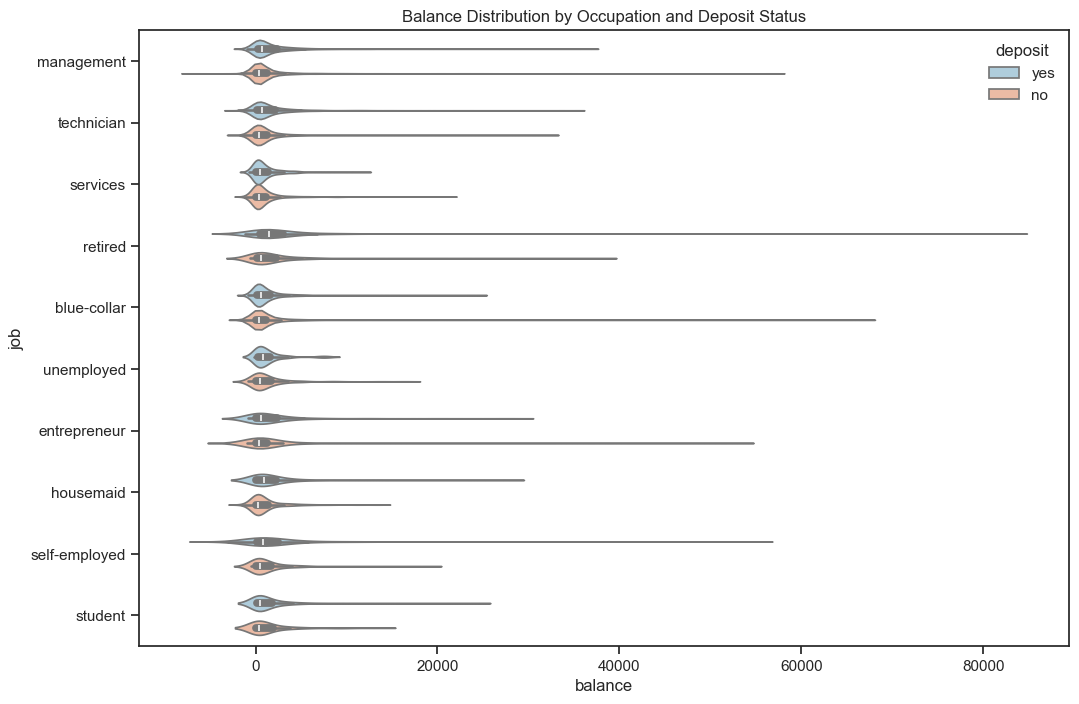

In [44]:
fig=plt.figure(figsize=(12,8))
sns.violinplot(data=df,x='balance',y='job',hue='deposit',palette='RdBu_r')
plt.title('Balance Distribution by Occupation and Deposit Status')
plt.show()

In [45]:
# The marital/education and balance status won't be useful for further analysis, so they can be dropped
df.drop(['marital/education','balance_status'],axis=1,inplace=True)

In [46]:
df.head()

age         job  marital  education default  balance housing loan  contact  \
0   59  management  married  secondary      no     2343     yes   no  unknown   
1   56  management  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54  management  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

In [47]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder

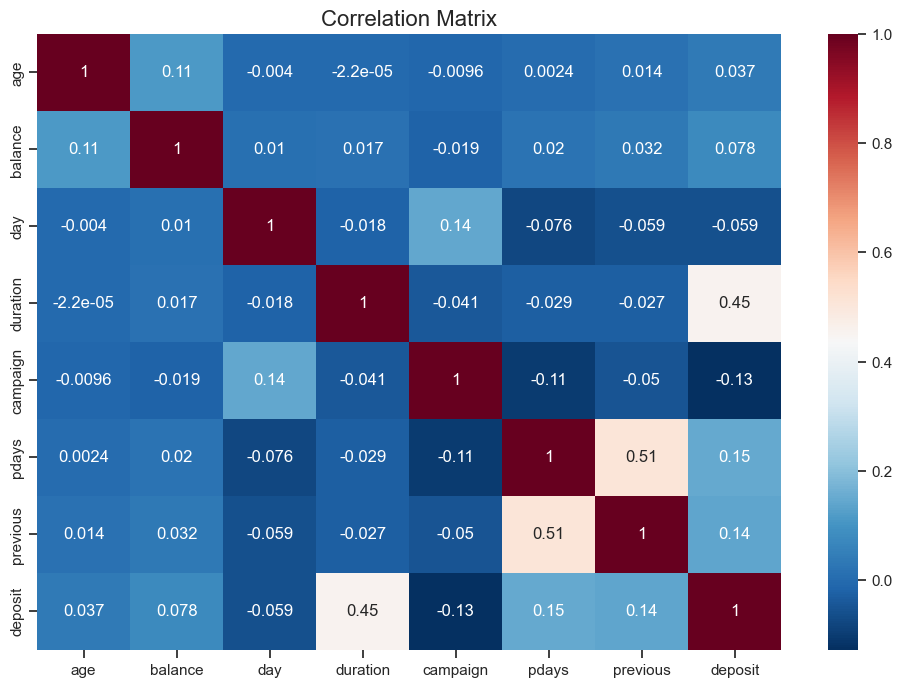

In [48]:
# Investigating the effect of duration on term deposit
fig=plt.figure(figsize=(12,8))
# Scaling categorical variable deposit
df['deposit']=LabelEncoder().fit_transform(df['deposit'])

# Separating numeric data types to create the correlation matrix
numeric_df=df.select_dtypes(exclude='object')

corr_numeric=numeric_df.corr()
sns.heatmap(data=corr_numeric,cbar=True,cmap='RdBu_r',annot=True)
plt.title('Correlation Matrix',fontsize=16)
plt.show()

The correlation matrix shows a strong positive correlation between duration and deposit

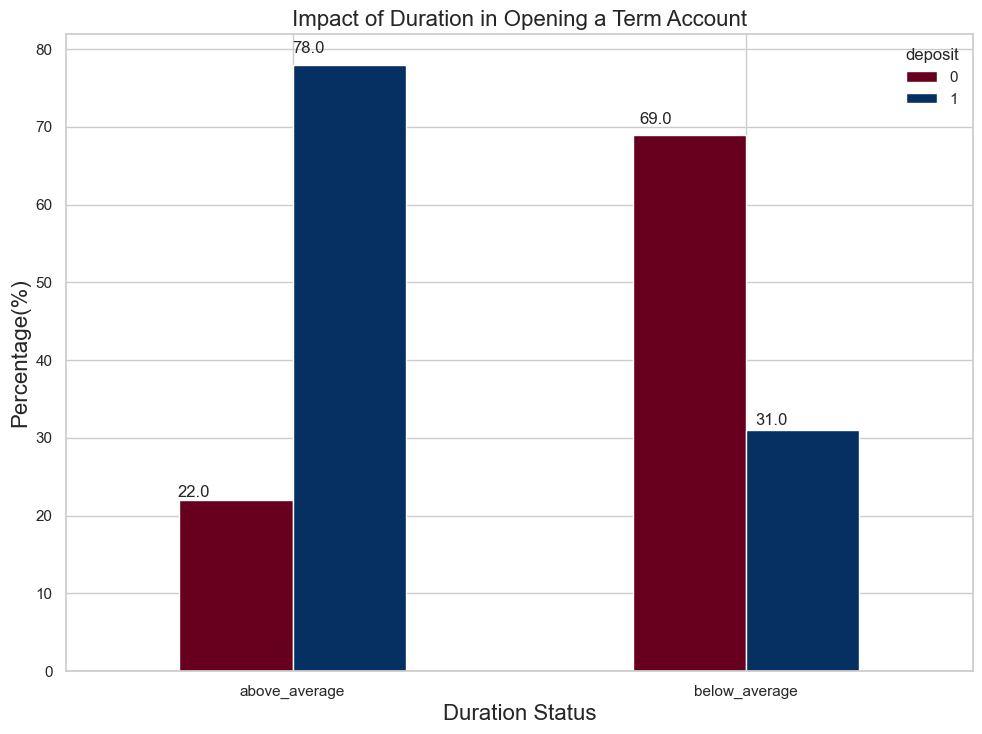

In [49]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')
avg_duration=df['duration'].mean()

df['duration_status']=np.where(df['duration']<avg_duration,'below_average','above_average')
pct_term=pd.crosstab(index=df['duration_status'],columns=df['deposit']).apply(lambda x: round(x/x.sum(),2)*100,axis=1)
ax=pct_term.plot(kind='bar',stacked=False,cmap='RdBu',rot=0)
plt.title('Impact of Duration in Opening a Term Account',fontsize=16)
plt.xlabel('Duration Status',fontsize=16)
plt.ylabel('Percentage(%)',fontsize=16)

for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()*1.02,p.get_height()*1.02))

plt.show()

Campaign duration has a high correlation with term deposits meaning the higher the duration, the more likely it is for a client to open a term deposit.

Duration Status: People who were above the average campaign duration (374.76) were more likely to open a term deposit. 78% of the group that is above average in duration opened term deposits while of those that were below average, 32% opened term deposit accounts. This tells us that it will be a good idea to target individuals who are in the above average category.

### Classification Model

In [50]:
dep=term_deposits['deposit']
term_deposits.drop(labels=['deposit'],axis=1,inplace=True)
term_deposits.insert(loc=0,column='deposit',value=dep)
term_deposits.head()

deposit  age         job  marital  education default  balance housing loan  \
0     yes   59      admin.  married  secondary      no     2343     yes   no   
1     yes   56      admin.  married  secondary      no       45      no   no   
2     yes   41  technician  married  secondary      no     1270     yes   no   
3     yes   55    services  married  secondary      no     2476     yes   no   
4     yes   54      admin.  married   tertiary      no      184      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome  
0  unknown    5   may      1042         1     -1         0  unknown  
1  unknown    5   may      1467         1     -1         0  unknown  
2  unknown    5   may      1389         1     -1         0  unknown  
3  unknown    5   may       579         1     -1         0  unknown  
4  unknown    5   may       673         2     -1         0  unknown

In [51]:
term_deposits['housing'].value_counts()/len(term_deposits)
#Majority of the customers do not own a house

housing
no     0.526877
yes    0.473123
Name: count, dtype: float64

In [52]:
term_deposits['loan'].value_counts()/len(term_deposits)
#Majority of the customers do not have a personal loan

loan
no     0.869199
yes    0.130801
Name: count, dtype: float64

Stratified Sampling:

Stratified sampling is crucial in both regression and classification models to prevent overfitting. When applying cross-validation, it’s important to ensure key features are evenly distributed across the training and test sets. For example, if a personal loan is a significant factor in determining whether a client will open a term deposit, we need to maintain the same distribution of this feature in both sets.

Steps for stratified sampling:

Check how the data is distributed.
In this case, 87% of clients do not have personal loans ("no") and 13% do ("yes").
Ensure the training and test sets maintain this 87:13 ratio for accurate results.

In [53]:
from sklearn.model_selection import StratifiedShuffleSplit

In [54]:
stratified=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_set,test_set in stratified.split(term_deposits,term_deposits['loan']):
    stratified_train=term_deposits.loc[train_set]
    stratified_test=term_deposits.loc[test_set]

In [55]:
stratified_train['loan'].value_counts()/len(stratified_train)

loan
no     0.86919
yes    0.13081
Name: count, dtype: float64

In [56]:
stratified_test['loan'].value_counts()/len(stratified_test)

loan
no     0.869234
yes    0.130766
Name: count, dtype: float64

In [57]:
train_data=stratified_train
test_data=stratified_test

In [58]:
train_data.shape

(8929, 17)

In [59]:
test_data.shape

(2233, 17)

In [60]:
# Training data has uniformly distributed data in both labels
train_data['deposit'].value_counts()

deposit
no     4697
yes    4232
Name: count, dtype: int64

In [61]:
# Code reference Hands on Machine Learning with Scikit Learn and Tensorflow by Aurelien Geron.

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [62]:
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [63]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8929 entries, 9867 to 9672
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   deposit    8929 non-null   object
 1   age        8929 non-null   int64 
 2   job        8929 non-null   object
 3   marital    8929 non-null   object
 4   education  8929 non-null   object
 5   default    8929 non-null   object
 6   balance    8929 non-null   int64 
 7   housing    8929 non-null   object
 8   loan       8929 non-null   object
 9   contact    8929 non-null   object
 10  day        8929 non-null   int64 
 11  month      8929 non-null   object
 12  duration   8929 non-null   int64 
 13  campaign   8929 non-null   int64 
 14  pdays      8929 non-null   int64 
 15  previous   8929 non-null   int64 
 16  poutcome   8929 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB


In [64]:
from sklearn.pipeline import Pipeline,FeatureUnion

In [65]:
#Creating pipelines

numerical_pipeline = Pipeline([("select_numeric", DataFrameSelector(["age", "balance", "day", "campaign", "pdays", "previous","duration"])),
                               ("std_scaler", StandardScaler())])

categorical_pipeline = Pipeline([("select_cat", DataFrameSelector(["job", "education", "marital", "default", "housing", "loan", "contact", "month",
                                     "poutcome"])),("cat_encoder", OneHotEncoder(sparse=False,handle_unknown='ignore'))])

preprocess_pipeline = FeatureUnion(transformer_list=[("numerical_pipeline", numerical_pipeline),("categorical_pipeline", categorical_pipeline)])

In [66]:
X_train=preprocess_pipeline.fit_transform(train_data)
X_train

array([[ 1.14643868,  1.68761105,  1.69442818, ...,  0.        ,
         0.        ,  1.        ],
       [-0.86102339, -0.35066205, -0.5560058 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.94466765, -0.20504785,  0.39154535, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.86102339, -0.26889658, -1.02978138, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.2263519 , -0.32166951,  0.50998924, ...,  0.        ,
         0.        ,  1.        ],
       [-0.61009063, -0.34740446,  1.69442818, ...,  1.        ,
         0.        ,  0.        ]])

In [67]:
y_train=train_data['deposit']
y_test=test_data['deposit']
y_train.shape

(8929,)

In [68]:
encode=LabelEncoder()
y_train=encode.fit_transform(y_train)
y_test=encode.fit_transform(y_test)
y_train_yes=(y_train==1)

In [69]:
y_train

array([0, 0, 1, ..., 1, 1, 0])

In [70]:
y_train_yes

array([False, False,  True, ...,  True,  True, False])

In [71]:
some_instance=X_train[1250]

In [72]:
import time
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB

In [73]:
dict_classifiers={'Logistic Regression':LogisticRegression(),
                  'Nearest Neighbors':KNeighborsClassifier(),
                  'Linear SVM':SVC(),
                  'Gradient Boosting Classifier':GradientBoostingClassifier(),
                  'Decision Tree':DecisionTreeClassifier(),
                  'Random Forest':RandomForestClassifier(n_estimators=18),
                  'Neural Net':MLPClassifier(),
                  'Naive Bayes':GaussianNB()
                 }

In [74]:
#  Thanks to Ahspinar for the function.

no_classifiers = len(dict_classifiers.keys())

def batch_classify(X_train, Y_train, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,3)), columns = ['classifier', 'train_score', 'training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.time()
        classifier.fit(X_train, Y_train)
        t_end = time.time()
        t_diff = t_end - t_start
        train_score = classifier.score(X_train, Y_train)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'training_time'] = t_diff
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=t_diff))
        count+=1
    return df_results

In [75]:
df_results=batch_classify(X_train,y_train)
print(df_results.sort_values(by='train_score',ascending=False))

c:\users\spars\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



trained Logistic Regression in 0.21 s


c:\users\spars\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



trained Nearest Neighbors in 0.00 s
trained Linear SVM in 3.14 s
trained Gradient Boosting Classifier in 2.15 s
trained Decision Tree in 0.09 s
trained Random Forest in 0.24 s
trained Neural Net in 13.36 s
trained Naive Bayes in 0.01 s
                     classifier  train_score  training_time
4                 Decision Tree     1.000000       0.090633
5                 Random Forest     0.997872       0.239388
6                    Neural Net     0.933699      13.362845
2                    Linear SVM     0.881958       3.143908
1             Nearest Neighbors     0.863255       0.000000
3  Gradient Boosting Classifier     0.861463       2.153819
0           Logistic Regression     0.830776       0.214757
7                   Naive Bayes     0.721693       0.014133


c:\users\spars\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [76]:
from sklearn.model_selection import cross_val_score

In [77]:
# Calculating Cross Validation Score for various models

# Logistic Regression
log_reg=LogisticRegression()
log_scores=cross_val_score(log_reg,X_train,y_train,cv=3)
log_reg_mean=log_scores.mean()

# SVM
svc_clf=SVC()
svc_scores=cross_val_score(svc_clf,X_train,y_train,cv=3)
svc_mean=svc_scores.mean()

# K Nearest Neighbors
knn_clf=KNeighborsClassifier()
knn_scores=cross_val_score(knn_clf,X_train,y_train,cv=3)
knn_mean=knn_scores.mean()

# Decision Tree
tree_clf=DecisionTreeClassifier()
tree_scores=cross_val_score(tree_clf,X_train,y_train,cv=3)
tree_mean=tree_scores.mean()

# Gradient Boosting Classifier
grad_clf=GradientBoostingClassifier()
grad_scores=cross_val_score(grad_clf,X_train,y_train,cv=3)
grad_mean=grad_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=18)
rand_scores = cross_val_score(rand_clf, X_train, y_train, cv=3)
rand_mean = rand_scores.mean()

# NeuralNet Classifier
neural_clf = MLPClassifier(alpha=1)
neural_scores = cross_val_score(neural_clf, X_train, y_train, cv=3)
neural_mean = neural_scores.mean()

# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_train, y_train, cv=3)
nav_mean = neural_scores.mean()

# Creating a dictionary with the mean score of each of the classifiers
d = {'Classifiers': ['Logistic Reg.', 'SVC', 'KNN', 'Decision Tree', 'Gradient Boosting', 'Random Forst', 'Neural Net', 'Naive Bayes'], 
    'Crossval Mean Scores': [log_reg_mean, svc_mean, knn_mean, tree_mean, grad_mean, rand_mean, neural_mean, nav_mean]}

# Assigining the results to a data frame
result_df = pd.DataFrame(data=d)

c:\users\spars\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\users\spars\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\users\spars\anaconda3\lib\site-packages

In [78]:
result_df=result_df.sort_values(by=['Crossval Mean Scores'],ascending=False)
result_df

Classifiers  Crossval Mean Scores
1                SVC              0.851831
6         Neural Net              0.846119
7        Naive Bayes              0.846119
4  Gradient Boosting              0.844440
5       Random Forst              0.838952
0      Logistic Reg.              0.828536
2                KNN              0.804569
3      Decision Tree              0.783738

I decided to proceed with gradient boosting classifier, since I get the advantage of getting insights into the feature importance. This will help me identify which features are more predictive, and whether further feature engineering is required. 

In [79]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,precision_recall_curve,roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_predict

In [80]:
y_train_pred=cross_val_predict(grad_clf,X_train,y_train,cv=3)
grad_clf.fit(X_train,y_train)
print('Gradient Boosting Classifier accuracy is %2.2f' % accuracy_score(y_train,y_train_pred))

Gradient Boosting Classifier accuracy is 0.84


In [81]:
from sklearn.metrics import confusion_matrix

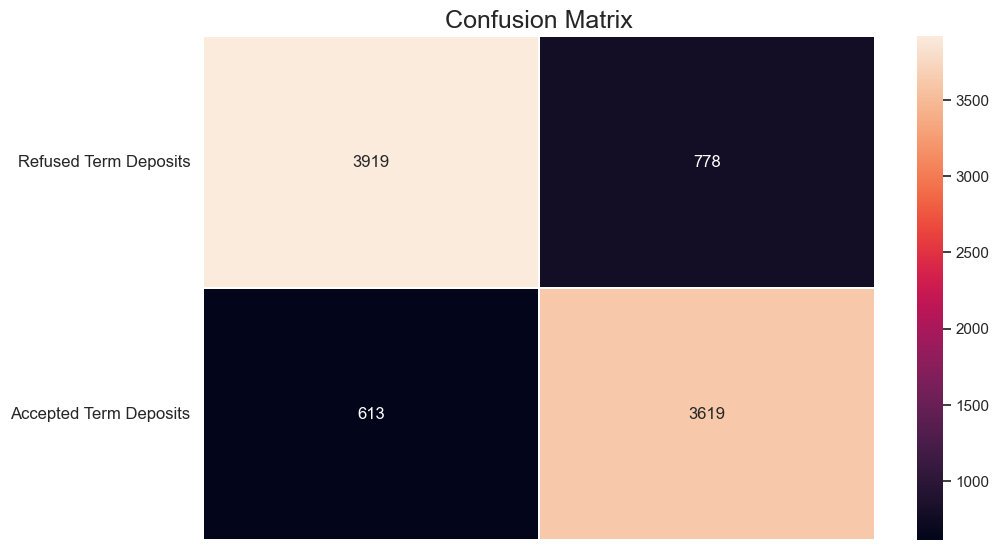

In [82]:
conf_matrix=confusion_matrix(y_train,y_train_pred)
f,ax=plt.subplots(figsize=(10,6))
sns.heatmap(conf_matrix,annot=True,fmt='d',linewidths=0.3,ax=ax)
plt.title('Confusion Matrix',fontsize=18)
plt.subplots_adjust(left=0.15,right=0.99,bottom=0.15,top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0])+0.5,minor=False)
ax.set_xticklabels('')
ax.set_yticklabels(['Refused Term Deposits','Accepted Term Deposits'],fontsize=12,rotation=360)
plt.show()

In [83]:
print('Precision Score: %2.4f' % precision_score(y_train,y_train_pred))
print('Recall Score: %2.4f' % recall_score(y_train,y_train_pred))

Precision Score: 0.8231
Recall Score: 0.8552


In [84]:
round(f1_score(y_train,y_train_pred),4)

0.8388

In [85]:
y_scores=grad_clf.decision_function([some_instance])
y_scores

# For binary classification problems, this score is positive if the model leans towards predicting the positive class (1) and negative if it 
# leans towards the negative class (0). The value of the score indicates how confident the model is in its prediction. A higher absolute value 
# means more confidence.

array([-3.65645629])

In [86]:
# Increasing the threshold decreases the recall
threshold=0
y_some_digit_pred=(y_scores>threshold)

In [87]:
y_scores=cross_val_predict(grad_clf,X_train,y_train,cv=3,method='decision_function')
neural_y_scores=cross_val_predict(neural_clf,X_train,y_train,cv=3,method='predict_proba')
naives_y_scores=cross_val_predict(nav_clf,X_train,y_train,cv=3,method='predict_proba')

In [88]:
# Hack to work around issue #9589 introduced in Scikit-Learn 0.19.0

if y_scores.ndim==2:
    y_scores=y_scores[:,1]

if neural_y_scores.ndim==2:
    neural_y_scores=neural_y_scores[:,1]

if naives_y_scores.ndim==2:
    naives_y_scores=naives_y_scores[:,1]

In [89]:
y_scores.shape

(8929,)

In [90]:
# Deciding which threshold to use

precisions,recalls,thresholds=precision_recall_curve(y_train,y_scores)

In [91]:
def precision_recall_curve(precisions,recalls,thresholds):
    fig,ax=plt.subplots(figsize=(10,6))
    plt.plot(thresholds,precisions[:-1],'r--',label='Precisions')
    plt.plot(thresholds,recalls[:-1],'#424242',label='Recalls')
    plt.title('Precision and Recall Tradeoff',fontsize=16)
    plt.ylabel('Level of Precision and Recall',fontsize=14)
    plt.xlabel('Thresholds',fontsize=14)
    plt.legend(loc='best',fontsize=12)
    plt.xlim([-2,4.7])
    plt.ylim([0,1])
    plt.axvline(x=0.13,linewidth=3,color='#0B3861')
    plt.annotate('Best Precision and \n Recall Balance \n is at 0.13 \n threshold',xy=(0.13,0.83),xytext=(55,-40),textcoords='offset points'
                ,arrowprops=dict(facecolor='black', shrink=0.05),fontsize=10,color='k')

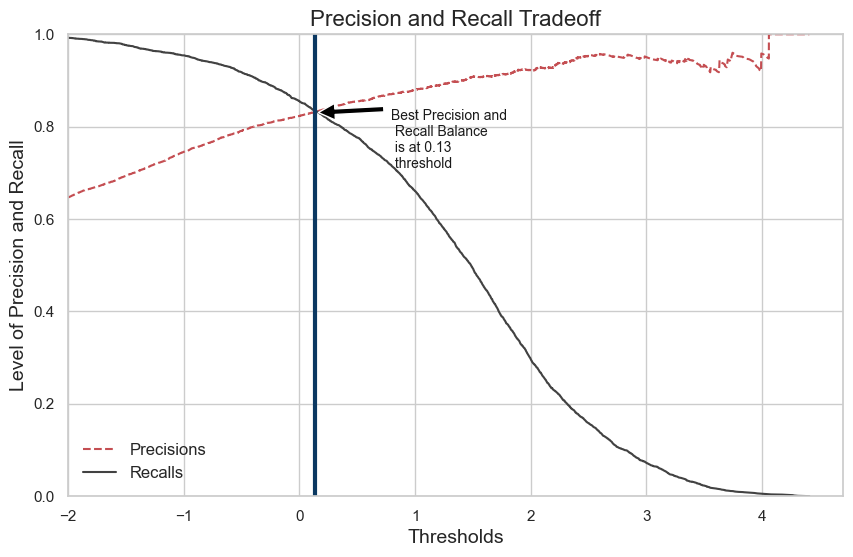

In [92]:
precision_recall_curve(precisions,recalls,thresholds)
plt.show()

In [93]:
grd_fpr, grd_tpr, thresold = roc_curve(y_train, y_scores)
neu_fpr, neu_tpr, neu_threshold = roc_curve(y_train, neural_y_scores)
nav_fpr, nav_tpr, nav_threshold = roc_curve(y_train, naives_y_scores)

In [94]:
def graph_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.figure(figsize=(10,6))
    plt.title('ROC Curve \n Gradient Boosting Classifier', fontsize=18)
    plt.plot(false_positive_rate, true_positive_rate, label=label)
    plt.plot([0, 1], [0, 1], '#0C8EE0')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('ROC Score of 91.73% \n (Not the best score)', xy=(0.25, 0.9), xytext=(0.4, 0.85),arrowprops=dict(facecolor='#F75118', shrink=0.05))
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum desirable score)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                 arrowprops=dict(facecolor='#F75118', shrink=0.05))

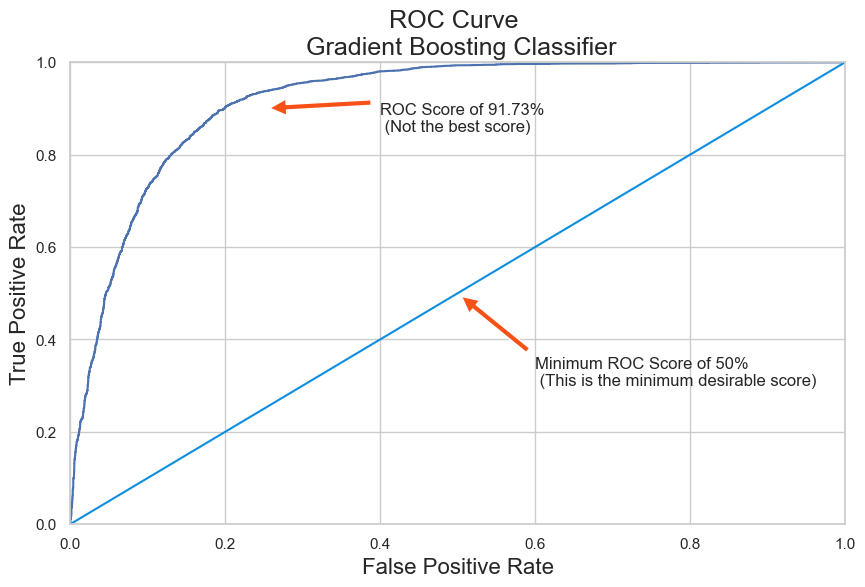

In [95]:
graph_roc_curve(grd_fpr, grd_tpr, threshold)
plt.show()

In [96]:
print('Gradient Boost Classifier Score: ', roc_auc_score(y_train, y_scores))
print('Neural Classifier Score: ', roc_auc_score(y_train, neural_y_scores))
print('Naives Bayes Classifier Score: ', roc_auc_score(y_train, naives_y_scores))

Gradient Boost Classifier Score:  0.9173395981749201
Neural Classifier Score:  0.9168065386223679
Naives Bayes Classifier Score:  0.803352414343226


In [97]:
def graph_roc_curve_multiple(grd_fpr, grd_tpr, neu_fpr, neu_tpr, nav_fpr, nav_tpr):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve \n Top 3 Classifiers', fontsize=18)
    plt.plot(grd_fpr, grd_tpr, label='Gradient Boosting Classifier (Score = 91.72%)')
    plt.plot(neu_fpr, neu_tpr, label='Neural Net Classifier (Score = 91.54%)')
    plt.plot(nav_fpr, nav_tpr, label='Naives Bayes Classifier (Score = 80.33%)')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()

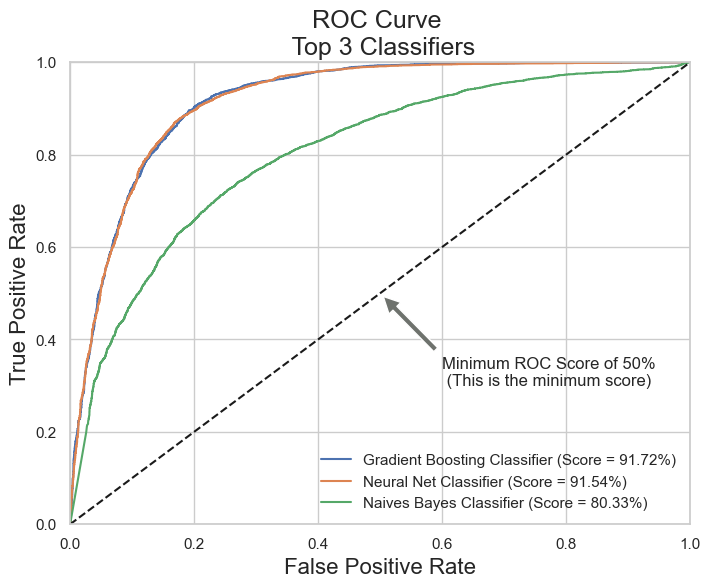

In [98]:
graph_roc_curve_multiple(grd_fpr, grd_tpr, neu_fpr, neu_tpr, nav_fpr, nav_tpr)
plt.show()

### Features influencing a Term Deposit Subscription

In [99]:
plt.style.use('seaborn-white')
from sklearn.model_selection import train_test_split
from sklearn import tree

C:\Users\spars\AppData\Local\Temp\ipykernel_6320\3060527113.py:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



In [100]:
# Converting columns into categorical variables

term_deposits['job']=term_deposits['job'].astype('category').cat.codes
term_deposits['marital'] = term_deposits['marital'].astype('category').cat.codes
term_deposits['education'] = term_deposits['education'].astype('category').cat.codes
term_deposits['contact'] = term_deposits['contact'].astype('category').cat.codes
term_deposits['poutcome'] = term_deposits['poutcome'].astype('category').cat.codes
term_deposits['month'] = term_deposits['month'].astype('category').cat.codes
term_deposits['default'] = term_deposits['default'].astype('category').cat.codes
term_deposits['loan'] = term_deposits['loan'].astype('category').cat.codes
term_deposits['housing'] = term_deposits['housing'].astype('category').cat.codes

In [101]:
target_name = 'deposit'
X = term_deposits.drop('deposit', axis=1)

label=term_deposits[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,label,test_size=0.2, random_state=42, stratify=label)

Feature ranking:
1. feature 11 (0.591310)
2. feature 8 (0.129966)
3. feature 6 (0.067020)
4. feature 13 (0.049923)
5. feature 15 (0.038138)
6. feature 14 (0.037830)
7. feature 10 (0.026646)
8. feature 5 (0.025842)
9. feature 0 (0.017757)
10. feature 12 (0.007889)
11. feature 3 (0.005280)
12. feature 9 (0.002200)
13. feature 2 (0.000147)
14. feature 1 (0.000050)
15. feature 7 (0.000000)
16. feature 4 (0.000000)


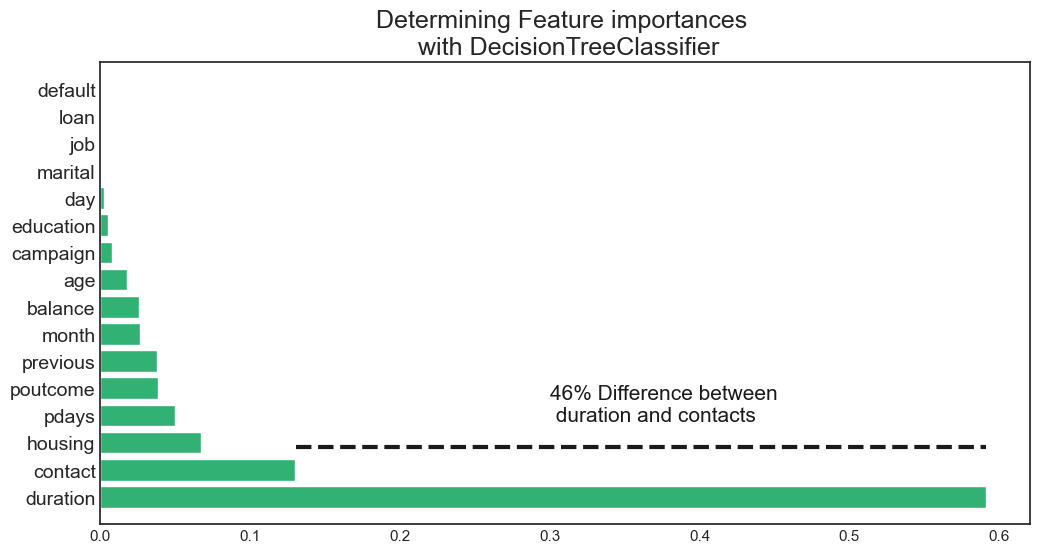

In [102]:
# Building a classification task using informative features
tree = tree.DecisionTreeClassifier(class_weight='balanced',min_weight_fraction_leaf = 0.01)
tree = tree.fit(X_train, y_train)
importances = tree.feature_importances_
feature_names = term_deposits.drop('deposit', axis=1).columns
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plotting the feature importances of the forest
def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(12,6))
    plt.title("Determining Feature importances \n with DecisionTreeClassifier", fontsize=18)
    plt.barh(range(len(indices)), importances[indices], color='#31B173',  align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=14)
    plt.ylim([-1, len(indices)])
    plt.axhline(y=1.85, xmin=0.21, xmax=0.952, color='k', linewidth=3, linestyle='--')
    plt.text(0.30, 2.8, '46% Difference between \n duration and contacts', color='k', fontsize=15)
    
feature_importance_graph(indices, importances, feature_names)
plt.show()

In [103]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[('gbc', grad_clf), ('nav', nav_clf), ('neural', neural_clf)],voting='soft')

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('gbc', GradientBoostingClassifier()),
                             ('nav', GaussianNB()),
                             ('neural', MLPClassifier(alpha=1))],
                 voting='soft')

In [104]:
from sklearn.metrics import accuracy_score

for clf in (grad_clf, nav_clf, neural_clf, voting_clf):
    clf.fit(X_train, y_train)
    predict = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, predict))

GradientBoostingClassifier 0.8463949843260188
GaussianNB 0.7514554411106136
MLPClassifier 0.780564263322884
VotingClassifier 0.812360053739364


Solutions for the Next Marketing Campaign (Conclusion)

-Optimal Months for Marketing: The highest marketing activity occurred in May, but it had a low effective rate (-34.49%). For the next campaign, focus on March, September, October, and December. Consider December due to its historically low activity.

-Seasonality: Clients preferred subscribing to term deposits in fall and winter. The campaign should be concentrated during these seasons.

-Limit Campaign Calls: Implement a policy limiting calls to no more than three per potential client, as more calls increase the likelihood of rejection.

-Target Age Groups: Focus on clients in their 20s or younger and 60s or older. Younger clients had a 60% likelihood of subscribing, while older clients had a 76% likelihood.

-Occupation Focus: Students and retirees are the most likely to subscribe to term deposits. Retirees, in particular, tend to use term deposits as a way to earn interest without needing quick access to their funds.

-House Loans and Balance: Clients with average or high balances, who are less likely to have house loans, are more likely to subscribe to term deposits. Focus on this group in the next campaign.

-Use a Questionnaire: Since call duration correlates positively with subscription, consider using a questionnaire to engage clients and extend conversations. This could increase the likelihood of success.

-Target Long Call Durations: Clients with call durations above 375 seconds have a 78% chance of subscribing to term deposits. Prioritize this group to boost campaign effectiveness.